<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Bag', 'Ankle boot']

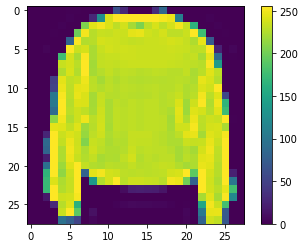

In [10]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4990 - accuracy: 0.8244
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3737 - accuracy: 0.8653
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3316 - accuracy: 0.8786
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3113 - accuracy: 0.8863
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.8911
Epoch 6/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2787 - accuracy: 0.8973
Epoch 7/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2664 - accuracy: 0.9013
Epoch 8/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2554 - accuracy: 0.9042


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3554 - accuracy: 0.8761
Test accuracy: 0.8761000037193298


313/313 [==============================] - 1s 2ms/step
Pullover


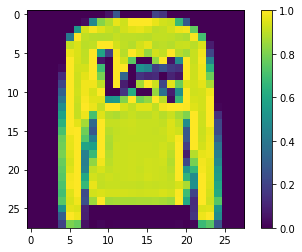

In [20]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar() 
plt.grid(False)
plt.show()